# **Computational Drug Discovery Project: Exploratory Data Analysis**
By Mathew Kuruvilla

Based on the Drug Discovery Project taught by Chanin Nantasenamat [*'Data Professor' YouTube channel*](http://youtube.com/dataprofessor)

In this project, I will be building a machine learning model using bioactivity data from ChEMBL for coronavirus replicase polyprotein 1ab inhibitors.
This Jupyter notebook will focus on molecular descriptor calculations and exploratory data analysis.

---

## **Install conda and rdkit**

In [42]:
!pip install rdkit

## **Load bioactivity data**

In [1]:
import pandas as pd

In [2]:
import os
print(os.getcwd())
print(os.listdir())

C:\Users\mathe\OneDrive - Temple University\Personal Projects\Coronavirus_Replicase_Polyprotein_1ab_Inhibitor_Sample_Project
['.ipynb_checkpoints', 'bioactivity_data.csv', 'bioactivity_data_with_descriptors.csv', 'bioactivity_preprocessed_data.csv', 'CDD_ML_Part_1_Data_Preprocessing.ipynb', 'CDD_ML_Part_2_Exploratory_Data_Analysis.ipynb', 'CDD_ML_Part_3_Dataset_Preparation.ipynb', 'CDD_ML_Part_4_Regression_with_Random_Forest.ipynb', 'CDD_ML_Part_5_Regression_Comparison.ipynb', 'coronavirus_replicase_polyprotein_1ab_data_2class_estate_fp.csv', 'descriptors_output.csv', 'mannwhitneyu_LogP.csv', 'mannwhitneyu_MW.csv', 'mannwhitneyu_NumHAcceptors.csv', 'mannwhitneyu_NumHDonors.csv', 'mannwhitneyu_pIC50.csv', 'molecule.smi', 'PaDEL-Descriptor', 'padel.zip', 'plot_bioactivity_class.pdf', 'plot_ic50.pdf', 'plot_LogP.pdf', 'plot_MW.pdf', 'plot_MW_vs_LogP.pdf', 'plot_NumHAcceptors.pdf', 'plot_NumHDonors.pdf', '__MACOSX']


In [3]:
df = pd.read_csv('bioactivity_preprocessed_data.csv')

## **Calculate Lipinski descriptors**
Christopher Lipinski, a scientist at Pfizer, came up with a set of rule-of-thumb for evaluating the **druglikeness** of compounds. Such druglikeness is based on the Absorption, Distribution, Metabolism and Excretion (ADME) that is also known as the pharmacokinetic profile. Lipinski analyzed all orally active FDA-approved drugs in the formulation of what is to be known as the **Rule-of-Five** or **Lipinski's Rule**.

The Lipinski's Rule stated the following:
* Molecular weight < 500 Dalton
* Octanol-water partition coefficient (LogP) < 5
* Hydrogen bond donors < 5
* Hydrogen bond acceptors < 10 

### **Import libraries**

In [4]:
import numpy as np
from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski

### **Calculate descriptors**

In [5]:
# Inspired by: https://codeocean.com/explore/capsules?query=tag:data-curation

def lipinski(smiles, verbose=False):

    moldata= []
    for elem in smiles:
        mol=Chem.MolFromSmiles(elem) 
        moldata.append(mol)
       
    baseData= np.arange(1,1)
    i=0  
    for mol in moldata:        
       
        desc_MolWt = Descriptors.MolWt(mol)              # Molecular weight
        desc_MolLogP = Descriptors.MolLogP(mol)          # Octanol-water partition coefficient
        desc_NumHDonors = Lipinski.NumHDonors(mol)       # Number of hydrogen bond donors
        desc_NumHAcceptors = Lipinski.NumHAcceptors(mol) # Number of hydrogen bond acceptors
           
        row = np.array([desc_MolWt,
                        desc_MolLogP,
                        desc_NumHDonors,
                        desc_NumHAcceptors])   
    
        if(i==0):
            baseData=row
        else:
            baseData=np.vstack([baseData, row])
        i=i+1      
    
    columnNames=["MW","LogP","NumHDonors","NumHAcceptors"]   
    descriptors = pd.DataFrame(data=baseData,columns=columnNames)
    
    return descriptors

In [6]:
df_lipinski = lipinski(df.canonical_smiles)

### **Combine DataFrames**

In [7]:
df_lipinski

,MW,LogP,NumHDonors,NumHAcceptors
0,369.368,3.51522,1.0,4.0
1,226.351,3.30451,0.0,5.0
2,334.400,3.26220,0.0,5.0
3,458.375,2.23320,8.0,11.0
4,237.052,2.22770,0.0,2.0
...,...,...,...,...
2396,398.492,2.79080,2.0,7.0
2397,364.369,1.19340,3.0,7.0
2398,325.368,3.50520,1.0,5.0
2399,449.374,4.24950,2.0,5.0


In [8]:
df

,molecule_chembl_id,canonical_smiles,standard_value,bioactivity_class
0,CHEMBL480,Cc1c(OCC(F)(F)F)ccnc1C[S+]([O-])c1nc2ccccc2[nH]1,390.0,active
1,CHEMBL178459,Cc1c(-c2cnccn2)ssc1=S,210.0,active
2,CHEMBL3545157,O=c1sn(-c2cccc3ccccc23)c(=O)n1Cc1ccccc1,80.0,active
3,CHEMBL297453,O=C(O[C@@H]1Cc2c(O)cc(O)cc2O[C@@H]1c1cc(O)c(O)...,1580.0,intermediate
4,CHEMBL4303595,O=C1C=Cc2cc(Br)ccc2C1=O,40.0,active
...,...,...,...,...
2396,CHEMBL5441534,CC(C)[C@H](Nc1ncncc1-c1nc[nH]n1)c1ccc2c(c1)S(=...,99500.0,inactive
2397,CHEMBL5441398,COc1ccc([C@H](Cc2nnn[nH]2)NC(=O)c2ncnc3[nH]ccc...,349.0,active
2398,CHEMBL5442105,CC(C)[C@@H](Oc1ncnc2[nH]ccc12)c1ccc2c(c1)OCCO2,99500.0,inactive
2399,CHEMBL5441739,CC(C)[C@@H](Nc1ncnc2[nH]c(Br)cc12)c1ccc2c(c1)S...,336.0,active


In [9]:
df_combined = pd.concat([df,df_lipinski], axis=1)

In [10]:
df_combined

,molecule_chembl_id,canonical_smiles,standard_value,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors
0,CHEMBL480,Cc1c(OCC(F)(F)F)ccnc1C[S+]([O-])c1nc2ccccc2[nH]1,390.0,active,369.368,3.51522,1.0,4.0
1,CHEMBL178459,Cc1c(-c2cnccn2)ssc1=S,210.0,active,226.351,3.30451,0.0,5.0
2,CHEMBL3545157,O=c1sn(-c2cccc3ccccc23)c(=O)n1Cc1ccccc1,80.0,active,334.400,3.26220,0.0,5.0
3,CHEMBL297453,O=C(O[C@@H]1Cc2c(O)cc(O)cc2O[C@@H]1c1cc(O)c(O)...,1580.0,intermediate,458.375,2.23320,8.0,11.0
4,CHEMBL4303595,O=C1C=Cc2cc(Br)ccc2C1=O,40.0,active,237.052,2.22770,0.0,2.0
...,...,...,...,...,...,...,...,...
2396,CHEMBL5441534,CC(C)[C@H](Nc1ncncc1-c1nc[nH]n1)c1ccc2c(c1)S(=...,99500.0,inactive,398.492,2.79080,2.0,7.0
2397,CHEMBL5441398,COc1ccc([C@H](Cc2nnn[nH]2)NC(=O)c2ncnc3[nH]ccc...,349.0,active,364.369,1.19340,3.0,7.0
2398,CHEMBL5442105,CC(C)[C@@H](Oc1ncnc2[nH]ccc12)c1ccc2c(c1)OCCO2,99500.0,inactive,325.368,3.50520,1.0,5.0
2399,CHEMBL5441739,CC(C)[C@@H](Nc1ncnc2[nH]c(Br)cc12)c1ccc2c(c1)S...,336.0,active,449.374,4.24950,2.0,5.0


### **Convert IC$_{50}$ to pIC$_{50}$**
To allow **IC$_{50}$** data to be more uniformly distributed, we will convert **IC$_{50}$** to the negative logarithmic scale which is essentially **-log10(IC$_{50}$)**.

This custom function pIC$_{50}$() will accept a DataFrame as input and will:
* Take the IC$_{50}$ values from the ``standard_value`` column and converts it from nM to M by multiplying the value by 10$^{-9}$
* Take the molar value and apply -log10
* Delete the ``standard_value`` column and create a new ``pIC50`` column

In [11]:
# https://github.com/chaninlab/estrogen-receptor-alpha-qsar/blob/master/02_ER_alpha_RO5.ipynb

import numpy as np

def pIC50(input):
    pIC50 = []

    for i in input['standard_value_norm']:
        molar = i*(10**-9) # Converts nM to M
        pIC50.append(-np.log10(molar))

    input['pIC50'] = pIC50
    x = input.drop('standard_value_norm', axis = 1)
        
    return x

In [12]:
df_combined.standard_value.describe()

count      2401.000000
mean      24954.216053
std       46518.466376
min           0.013000
25%         270.000000
50%        2350.000000
75%       26445.000000
max      500000.000000
Name: standard_value, dtype: float64

Values greater than 100,000,000 will be fixed at 100,000,000 otherwise the negative logarithmic value will become negative.

In [13]:
print(-np.log10((10**-9)*100000000))

1.0


In [14]:
print(-np.log10((10**-9)*1000000000))

-0.0


In [15]:
print(-np.log10((10**-9)*10000000000))

-1.0


In [16]:
def norm_value(input):
    norm = []

    for i in input['standard_value']:
        if i > 100000000:
          i = 100000000
        norm.append(i)

    input['standard_value_norm'] = norm
    x = input.drop('standard_value', axis=1)
    
    return x

We will first apply the norm_value() function so that the values in the standard_value column is normalized.

In [17]:
df_norm = norm_value(df_combined)
df_norm

,molecule_chembl_id,canonical_smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,standard_value_norm
0,CHEMBL480,Cc1c(OCC(F)(F)F)ccnc1C[S+]([O-])c1nc2ccccc2[nH]1,active,369.368,3.51522,1.0,4.0,390.0
1,CHEMBL178459,Cc1c(-c2cnccn2)ssc1=S,active,226.351,3.30451,0.0,5.0,210.0
2,CHEMBL3545157,O=c1sn(-c2cccc3ccccc23)c(=O)n1Cc1ccccc1,active,334.400,3.26220,0.0,5.0,80.0
3,CHEMBL297453,O=C(O[C@@H]1Cc2c(O)cc(O)cc2O[C@@H]1c1cc(O)c(O)...,intermediate,458.375,2.23320,8.0,11.0,1580.0
4,CHEMBL4303595,O=C1C=Cc2cc(Br)ccc2C1=O,active,237.052,2.22770,0.0,2.0,40.0
...,...,...,...,...,...,...,...,...
2396,CHEMBL5441534,CC(C)[C@H](Nc1ncncc1-c1nc[nH]n1)c1ccc2c(c1)S(=...,inactive,398.492,2.79080,2.0,7.0,99500.0
2397,CHEMBL5441398,COc1ccc([C@H](Cc2nnn[nH]2)NC(=O)c2ncnc3[nH]ccc...,active,364.369,1.19340,3.0,7.0,349.0
2398,CHEMBL5442105,CC(C)[C@@H](Oc1ncnc2[nH]ccc12)c1ccc2c(c1)OCCO2,inactive,325.368,3.50520,1.0,5.0,99500.0
2399,CHEMBL5441739,CC(C)[C@@H](Nc1ncnc2[nH]c(Br)cc12)c1ccc2c(c1)S...,active,449.374,4.24950,2.0,5.0,336.0


In [18]:
df_norm.standard_value_norm.describe()

count      2401.000000
mean      24954.216053
std       46518.466376
min           0.013000
25%         270.000000
50%        2350.000000
75%       26445.000000
max      500000.000000
Name: standard_value_norm, dtype: float64

In [19]:
df_final = pIC50(df_norm)
df_final

,molecule_chembl_id,canonical_smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL480,Cc1c(OCC(F)(F)F)ccnc1C[S+]([O-])c1nc2ccccc2[nH]1,active,369.368,3.51522,1.0,4.0,6.408935
1,CHEMBL178459,Cc1c(-c2cnccn2)ssc1=S,active,226.351,3.30451,0.0,5.0,6.677781
2,CHEMBL3545157,O=c1sn(-c2cccc3ccccc23)c(=O)n1Cc1ccccc1,active,334.400,3.26220,0.0,5.0,7.096910
3,CHEMBL297453,O=C(O[C@@H]1Cc2c(O)cc(O)cc2O[C@@H]1c1cc(O)c(O)...,intermediate,458.375,2.23320,8.0,11.0,5.801343
4,CHEMBL4303595,O=C1C=Cc2cc(Br)ccc2C1=O,active,237.052,2.22770,0.0,2.0,7.397940
...,...,...,...,...,...,...,...,...
2396,CHEMBL5441534,CC(C)[C@H](Nc1ncncc1-c1nc[nH]n1)c1ccc2c(c1)S(=...,inactive,398.492,2.79080,2.0,7.0,4.002177
2397,CHEMBL5441398,COc1ccc([C@H](Cc2nnn[nH]2)NC(=O)c2ncnc3[nH]ccc...,active,364.369,1.19340,3.0,7.0,6.457175
2398,CHEMBL5442105,CC(C)[C@@H](Oc1ncnc2[nH]ccc12)c1ccc2c(c1)OCCO2,inactive,325.368,3.50520,1.0,5.0,4.002177
2399,CHEMBL5441739,CC(C)[C@@H](Nc1ncnc2[nH]c(Br)cc12)c1ccc2c(c1)S...,active,449.374,4.24950,2.0,5.0,6.473661


In [20]:
df_final.pIC50.describe()

count    2401.000000
mean        5.681243
std         1.262465
min         3.301030
25%         4.577656
50%         5.628932
75%         6.568636
max        10.886057
Name: pIC50, dtype: float64

### **Removing the 'intermediate' bioactivity class**
Here, we will be removing the ``intermediate`` class from our data set as we want to deal with only active and inactive data.

In [21]:
df_2class = df_final[df_final.bioactivity_class != 'intermediate']
df_2class

,molecule_chembl_id,canonical_smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL480,Cc1c(OCC(F)(F)F)ccnc1C[S+]([O-])c1nc2ccccc2[nH]1,active,369.368,3.51522,1.0,4.0,6.408935
1,CHEMBL178459,Cc1c(-c2cnccn2)ssc1=S,active,226.351,3.30451,0.0,5.0,6.677781
2,CHEMBL3545157,O=c1sn(-c2cccc3ccccc23)c(=O)n1Cc1ccccc1,active,334.400,3.26220,0.0,5.0,7.096910
4,CHEMBL4303595,O=C1C=Cc2cc(Br)ccc2C1=O,active,237.052,2.22770,0.0,2.0,7.397940
6,CHEMBL55400,Nc1ccc2cc3ccc(N)cc3nc2c1,active,209.252,2.55240,2.0,3.0,6.443697
...,...,...,...,...,...,...,...,...
2396,CHEMBL5441534,CC(C)[C@H](Nc1ncncc1-c1nc[nH]n1)c1ccc2c(c1)S(=...,inactive,398.492,2.79080,2.0,7.0,4.002177
2397,CHEMBL5441398,COc1ccc([C@H](Cc2nnn[nH]2)NC(=O)c2ncnc3[nH]ccc...,active,364.369,1.19340,3.0,7.0,6.457175
2398,CHEMBL5442105,CC(C)[C@@H](Oc1ncnc2[nH]ccc12)c1ccc2c(c1)OCCO2,inactive,325.368,3.50520,1.0,5.0,4.002177
2399,CHEMBL5441739,CC(C)[C@@H](Nc1ncnc2[nH]c(Br)cc12)c1ccc2c(c1)S...,active,449.374,4.24950,2.0,5.0,6.473661


In [22]:
df_2class.to_csv('bioactivity_data_with_descriptors.csv')

---

## **Exploratory Data Analysis (Chemical Space Analysis) via Lipinski descriptors**

### **Import library**

In [23]:
import seaborn as sns
sns.set(style='ticks')
import matplotlib.pyplot as plt

### **Frequency plot of the 2 bioactivity classes**

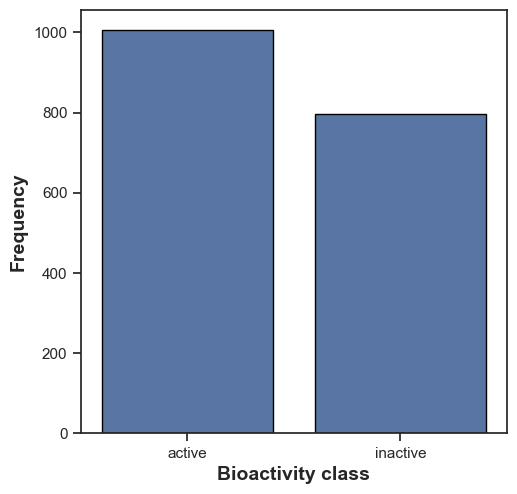

In [24]:
plt.figure(figsize=(5.5, 5.5))

sns.countplot(x='bioactivity_class', data=df_2class, edgecolor='black')

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')

plt.savefig('plot_bioactivity_class.pdf')

### **Scatter plot of MW versus LogP**

It can be seen that the 2 bioactivity classes are spanning similar chemical spaces as evident by the scatter plot of MW vs LogP.

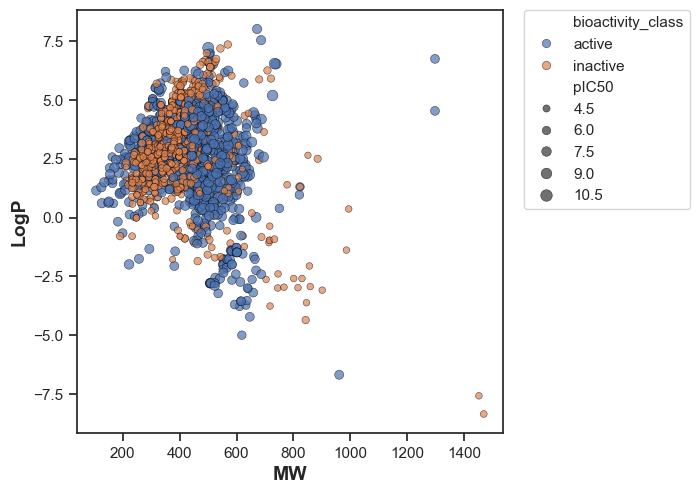

In [25]:
plt.figure(figsize=(5.5, 5.5))

sns.scatterplot(x='MW', y='LogP', data=df_2class, hue='bioactivity_class', size='pIC50', edgecolor='black', alpha=0.7)

plt.xlabel('MW', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
plt.savefig('plot_MW_vs_LogP.pdf')

### **Box plots**

#### **pIC50 value**

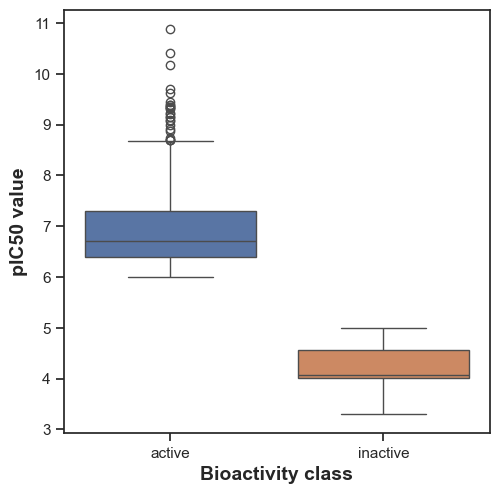

In [26]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'pIC50', data = df_2class, hue = 'bioactivity_class')

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('pIC50 value', fontsize=14, fontweight='bold')

plt.savefig('plot_ic50.pdf')

#### **Statistical analysis | Mann-Whitney U Test**

In [27]:
def mannwhitney(descriptor, verbose=False):
  # https://machinelearningmastery.com/nonparametric-statistical-significance-tests-in-python/
  from numpy.random import seed
  from numpy.random import randn
  from scipy.stats import mannwhitneyu

# seed the random number generator
  seed(1)

# actives and inactives
  selection = [descriptor, 'bioactivity_class']
  df = df_2class[selection]
  active = df[df.bioactivity_class == 'active']
  active = active[descriptor]

  selection = [descriptor, 'bioactivity_class']
  df = df_2class[selection]
  inactive = df[df.bioactivity_class == 'inactive']
  inactive = inactive[descriptor]

# compare samples
  stat, p = mannwhitneyu(active, inactive)
  #print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpret
  alpha = 0.05
  if p > alpha:
    interpretation = 'Same distribution (fail to reject H0)'
  else:
    interpretation = 'Different distribution (reject H0)'
  
  results = pd.DataFrame({'Descriptor':descriptor,
                          'Statistics':stat,
                          'p':p,
                          'alpha':alpha,
                          'Interpretation':interpretation}, index=[0])
  filename = 'mannwhitneyu_' + descriptor + '.csv'
  results.to_csv(filename)

  return results

In [28]:
mannwhitney('pIC50')

,Descriptor,Statistics,p,alpha,Interpretation
0,pIC50,800776.0,5.506524e-293,0.05,Different distribution (reject H0)


#### **MW**

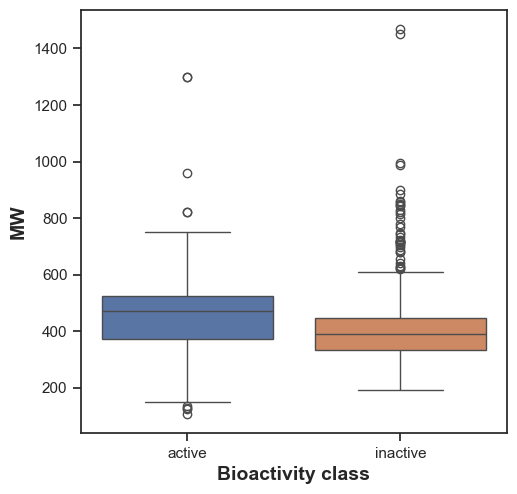

In [29]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'MW', data = df_2class, hue = 'bioactivity_class')

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('MW', fontsize=14, fontweight='bold')

plt.savefig('plot_MW.pdf')

In [30]:
mannwhitney('MW')

,Descriptor,Statistics,p,alpha,Interpretation
0,MW,532907.5,1.325210e-33,0.05,Different distribution (reject H0)


#### **LogP**

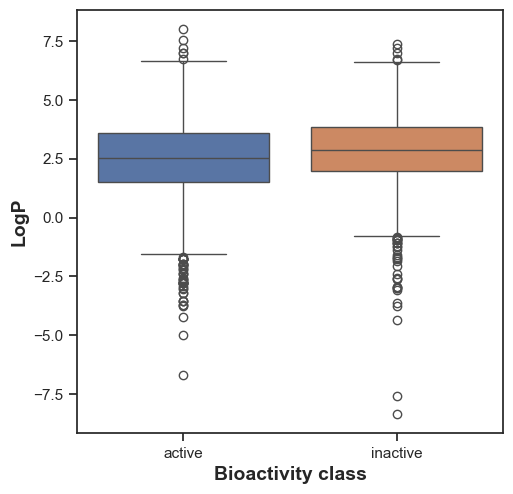

In [31]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'LogP', data = df_2class, hue = 'bioactivity_class')

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')

plt.savefig('plot_LogP.pdf')

**Statistical analysis | Mann-Whitney U Test**

In [32]:
mannwhitney('LogP')

,Descriptor,Statistics,p,alpha,Interpretation
0,LogP,339201.5,2.431034e-08,0.05,Different distribution (reject H0)


#### **NumHDonors**

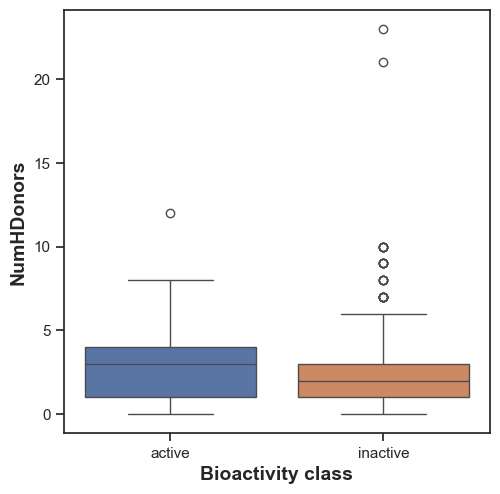

In [33]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'NumHDonors', data = df_2class, hue = 'bioactivity_class')

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHDonors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHDonors.pdf')

**Statistical analysis | Mann-Whitney U Test**

In [34]:
mannwhitney('NumHDonors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHDonors,430518.0,0.005057,0.05,Different distribution (reject H0)


#### **NumHAcceptors**

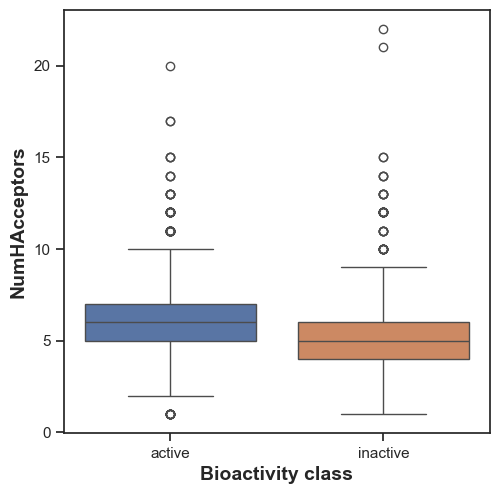

In [35]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'NumHAcceptors', data = df_2class, hue = 'bioactivity_class')

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHAcceptors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHAcceptors.pdf')

In [36]:
mannwhitney('NumHAcceptors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHAcceptors,470040.5,1.215797e-10,0.05,Different distribution (reject H0)


#### **Interpretation of Statistical Results**

##### **Box Plots**

###### **pIC50 values**

Taking a look at pIC50 values, the **actives** and **inactives** displayed a ***statistically significant difference***, which is to be expected since threshold values (``IC50 < 1,000 nM = Actives while IC50 > 10,000 nM = Inactives``, corresponding to ``pIC50 > 6 = Actives and pIC50 < 5 = Inactives``) were used to define actives and inactives.

###### **Lipinski's descriptors**

Of the 4 Lipinski's descriptors (MW, LogP, NumHDonors and NumHAcceptors), all 4 descriptors show ***statistically significant differences*** between **actives** and **inactives**.